Randomized Singular Value Decomposition is a modification of SVD that is applied to high dimensional data in a matrix A where we thinks there is a low-rank structure between its rows and columns that we can mine out and reduce the dimensions of the matrix.

The technique is based on the emerging techniques in randomized linear algebra, high-dimensional geometry and random matrix theory.



In [1]:
#Importing required libraries and functions

import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
from tkinter import *
from tkinter import filedialog
import cv2

#Figures sizing
plt.rcParams['figure.figsize'] = [16,6]
plt.rcParams.update({'font.size': 18})

In [2]:
# Defining randomized SVD function

def rSVD(A,r,q,p):
    
    # Step 1: Sample column space of A with P matrix
    
    #Taking the number of rows of matrix A
    ny = A.shape[1]
    
    #Random projection matrix with rank-r with oversampling factor p
    P = np.random.randn(ny,r+p)
    
    #Resulting matrix with same dominant columns SVD
    Z = A @ P
    for k in range(q):
        Z = A @ (A.T @ Z)
    
    #QR approximation of Z
    Q, R = np.linalg.qr(Z,mode='reduced')

    # Step 2: Compute SVD on projected Y = Q.T @ A
    Y = Q.T @ A
    UY, S, VT = np.linalg.svd(Y,full_matrices=0)
    U = Q @ UY

    return U, S, VT

In [3]:
def Configure():
    
    filepath = filedialog.askopenfilename()
    global A
    A = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    
    #Setting the desired rank
    global r
    r =rank.get()
    
    #Setting the desired power iteration parameter
    global q
    q =iteration.get()
    
    #Setting the desired oversampling parameter
    global p
    p =sampling.get()

    window.destroy()
    
window = Tk()
window.title('Configuration')
window.geometry('300x500')

rank_label=StringVar()
rank_label.set("Enter your desired rank: ")
rank_label=Label(window, textvariable=rank_label, height=1)
rank_label.pack(pady=20)
rank=Entry(window,width=10)
rank.pack()

iteration_label=StringVar()
iteration_label.set("Enter your desired power iteration parameter: ")
iteration_label=Label(window, textvariable=iteration_label, height=1)
iteration_label.pack(pady=20)
iteration=Entry(window,width=10)
iteration.pack()

sampling_label=StringVar()
sampling_label.set("Enter your desired Oversampling parameter: ")
sampling_label=Label(window, textvariable=sampling_label, height=1)
sampling_label.pack(pady=20)
sampling=Entry(window,width=10)
sampling.pack()

button = Button(text="Choose your file",height=10, width=20, bg='#9B00B3', fg='White',command=Configure)
button.pack(pady=30)
window.mainloop()

# Deterministic SVD
U, S, VT = np.linalg.svd(A,full_matrices=0) 

# Target rankd
r = int(r) 

# Power iterations
q = int(q)  

# Oversampling parameter
p = int(p)   

rU, rS, rVT = rSVD(A,r,q,p)


In [4]:
## Reconstruction

# SVD approximation
ASVD = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:] 
errSVD = np.linalg.norm(A-ASVD,ord=2) / np.linalg.norm(A,ord=2)

# SVD approximation
ArSVD = rU[:,:(r+1)] @ np.diag(rS[:(r+1)]) @ rVT[:(r+1),:] 
errSVD = np.linalg.norm(A-ArSVD,ord=2) / np.linalg.norm(A,ord=2)

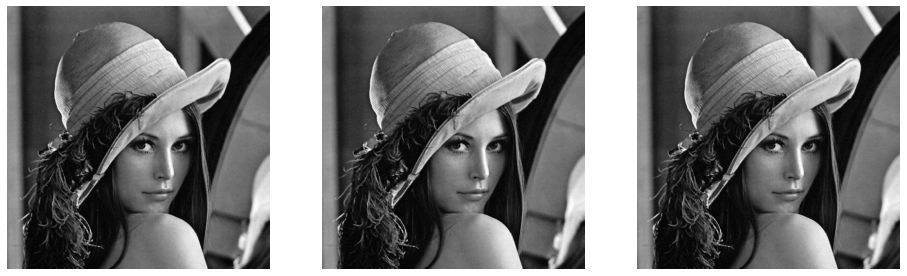

In [5]:
## Ploting three results : Normal, SVD and rSVD form
fig, axs = plt.subplots(1,3)

plt.set_cmap('gray')
axs[0].imshow(A)
axs[0].axis('off')
axs[1].imshow(ASVD)
axs[1].axis('off')
axs[2].imshow(ArSVD)
axs[2].axis('off')

plt.show()

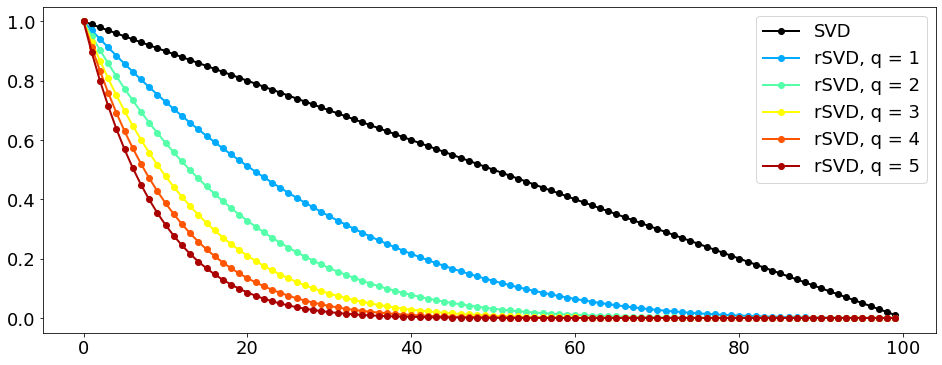

In [6]:
## Illustration of power iterations and decaying the singular values
A = np.random.randn(1000,100)
U, S, VT = np.linalg.svd(A,full_matrices=0)
S = np.arange(1,0,-0.01)
A = U @ np.diag(S) @ VT

# Defining color map
color_list = np.array([[0,0,2/3],  
                 [0,0,1],
                 [0,1/3,1],
                 [0,2/3,1],
                 [0,1,1],
                 [1/3,1,2/3],
                 [2/3,1,1/3],
                 [1,1,0],
                 [1,2/3,0],
                 [1,1/3,0],
                 [1,0,0],
                 [2/3,0,0]])

plt.plot(S,'o-',color='k',linewidth=2,label='SVD')

Y = A
for q in range(1,6):
    Y = A.T @ Y
    Y = A @ Y
    Uq, Sq, VTq = np.linalg.svd(Y,full_matrices=0)
    plt.plot(Sq,'-o',color=tuple(color_list[2*q+1]),linewidth=2,label='rSVD, q = '+str(q))

plt.legend()
plt.show()